<a href="https://colab.research.google.com/github/jana-nf/Curso-OceanSamsung-OtimizacaoComputacaoEvolutiva/blob/main/Curso_Ocean_Otimiz_Ex01_(Montevechi_2007_Exemplo_4_3_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("lpSolve") #pacote para programação linear

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(lpSolve)

In [3]:
# Modelagem do problema
f.obj <- c(3,2)
f.con <- matrix(c(2,1,1,1,1,0), nrow=3, byrow=TRUE)
f.dir <- c("<=","<=","<=")
f.rhs <- c(100,80,40)

f.con

2,1
1,1
1,0


In [4]:
# valores das variáveis de decisão (x1, x2, x3)
lp("max",f.obj, f.con, f.dir, f.rhs)$solution

[1] 20 60

In [5]:
# valor da função objetivo (Z)
lp("max",f.obj, f.con, f.dir, f.rhs)

Success: the objective function is 180 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_point(aes(x = 20, y = 60), color = "red", size = 4):
“All aesthetics have length 1, but the data has 300 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


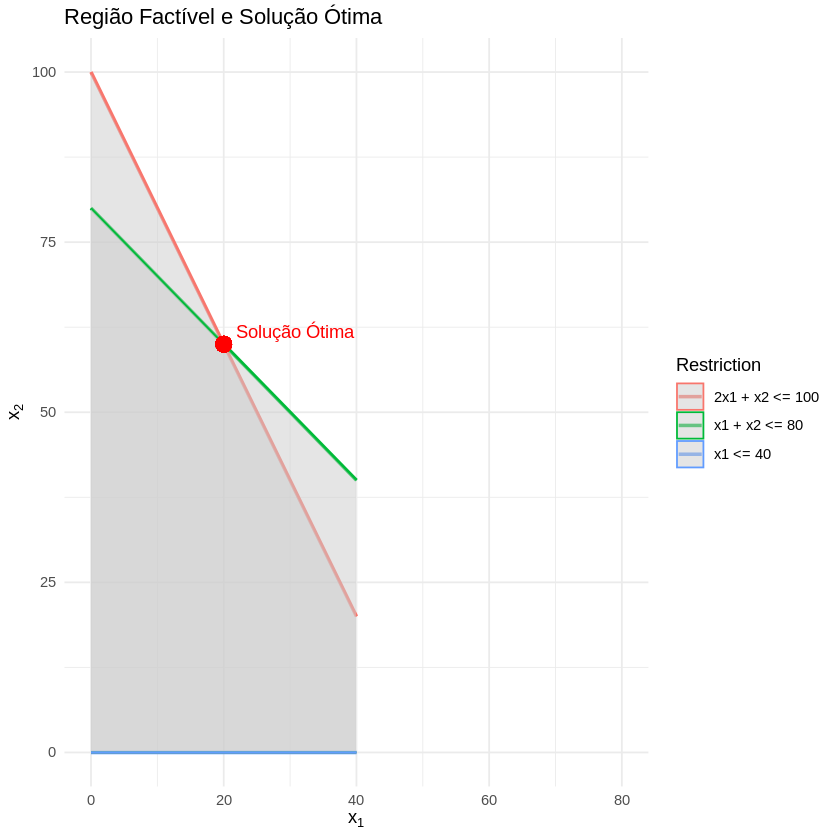

In [6]:
#-----------> Visualização Gráfica

library(ggplot2)

# Restrição 1: 2x1 + x2 <= 100
x1_vals <- seq(0, 40, length.out = 100)
x2_vals_1 <- 100 - 2 * x1_vals

# Restrição 2: x1 + x2 <= 80
x2_vals_2 <- 80 - x1_vals

# Restrição 3: x1 <= 40
x2_vals_3 <- rep(0, 100)

# Gráfico
plot_df <- data.frame(x1 = c(x1_vals, x1_vals, x1_vals),
                      x2 = c(x2_vals_1, x2_vals_2, x2_vals_3),
                      Restriction = rep(c("2x1 + x2 <= 100", "x1 + x2 <= 80", "x1 <= 40"), each = 100))

ggplot(data = plot_df, aes(x = x1, y = x2, color = Restriction)) +
  geom_line(size = 1) +
  scale_y_continuous(limits = c(0, 100)) +
  scale_x_continuous(limits = c(0, 80)) +
  labs(x = expression(x[1]), y = expression(x[2]), title = "Região Factível e Solução Ótima") +
  theme_minimal() +
  geom_ribbon(data = plot_df, aes(ymin = 0, ymax = x2), fill = "grey80", alpha = 0.5) +
  geom_point(aes(x = 20, y = 60), color = "red", size = 4) +
  annotate("text", x = 20, y = 60, label = "Solução Ótima", hjust = -0.1, vjust = -0.5, color = "red")

